# TRANSFER LEARNING FOR CIFAR-10 AND CIFAR-100

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Now, we will load Inception-v3 embeddings (2048 dimensional) for CIFAR-10 and  CIFAR-100 [1]. The embeddings were obtained by performing forward pass through saved models in TensorFlow, and these embeddings for the training and validation sets have been shared on the google drive link in Readme.

1. X_train10.npy has training image data of CIFAR-10
2. X_val10.npy has validation image data of CIFAR-10
3. y_train10.npy has corresponding training targets of CIFAR-10
4. y_val10.npy has corresponding validation targets of CIFAR-10
5. X_train100.npy has training image data of CIFAR-100
6. X_val100.npy has validation image data of CIFAR-100
7. y_train100.npy has corresponding training targets of CIFAR-100
8. y_val100.npy has corresponding validation targets of CIFAR-100

In [16]:
#loading data
x_train10 = np.load('X_train10.npy')
y_train10 = np.load('y_train10.npy')
x_val10 = np.load('X_val10.npy')
y_val10 = np.load('y_val10.npy')
x_train100 = np.load('X_train100.npy')
y_train100 = np.load('y_train100.npy')
x_val100 = np.load('X_val100.npy')
y_val100 = np.load('y_val100.npy')
print x_train10.shape,y_train10.shape,x_val10.shape,y_val10.shape,x_train100.shape,y_train100.shape,x_val100.shape,y_val100.shape

(40000L, 2048L) (40000L,) (10000L, 2048L) (10000L,) (40000L, 2048L) (40000L,) (10000L, 2048L) (10000L,)


In [10]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [31]:
def acc(x,y):
    return np.sum(x == y)/(1.0 * y.shape[0])

Confusion matrix, without normalization
[[3682   39   83   21   27    7   15   40  151   44]
 [  21 3769    1    7    0    1    2    1   24  138]
 [  77    6 3586  132  128   42  120   29    4    4]
 [  27   13  116 3341   79  315  124   43   25   10]
 [  19    2   80   61 3531   44   55  122    7    3]
 [   6    2   31  310   32 3521   16   77    3    2]
 [   8    1   66   71   60   15 3658    3    3    6]
 [  14    0   29   36  133   51    6 3674    4    6]
 [ 106   27    7    6    6    3    3    3 3754   33]
 [  40  141    1   15    4    1    1    8   25 3754]]


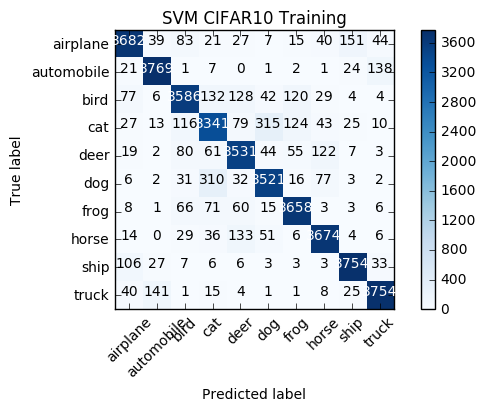

training accuracy for SVM CIFAR10 = 0.90675
Confusion matrix, without normalization
[[888  17  28  10  10   1   3   9  52  14]
 [  8 922   2   5   0   2   1   0   8  37]
 [ 19   2 882  39  49  16  40  12   8   5]
 [ 11   4  28 784  31 109  47  13   4   5]
 [  8   0  19  27 847  11  15  38   0   1]
 [  5   1   9  82  11 841   8  28   0   0]
 [  2   2  18  31  13   4 884   2   3   0]
 [  3   1   8  14  38  16   0 894   1   6]
 [ 44  10   4   2   1   0   2   3 910   8]
 [ 12  41   2   6   0   0   0   1  14 924]]


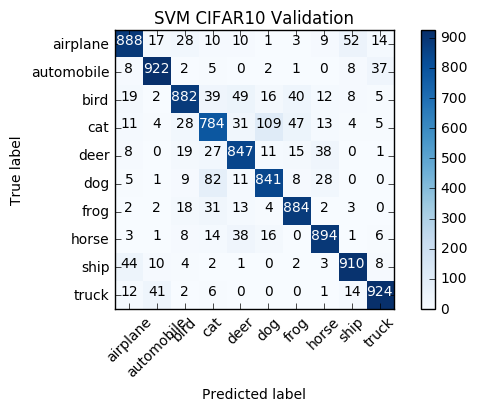

validation accuracy for SVM CIFAR10 = 0.8776


In [38]:
#SVM linear CIFAR10
C = 0.1
svc1 = svm.SVC(kernel='linear', C=C).fit(x_train10[0:10001,:],y_train10[0:10001])
res1 = svc1.predict(x_train10)
res2 = svc1.predict(x_val10)


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

cnf_matrix = confusion_matrix(res1, y_train10)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names, title = 'SVM CIFAR10 Training')
plt.show()
print "training accuracy for SVM CIFAR10 = " + str(acc(res1,y_train10))

cnf_matrix = confusion_matrix(res2, y_val10)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names ,title = 'SVM CIFAR10 Validation')
plt.show()
print "validation accuracy for SVM CIFAR10 = " + str(acc(res2,y_val10))

In [ ]:
# SVM linear CIFAR100
svc2 = svm.SVC(kernel='linear', C=C).fit(x_train100[0:10001,:],y_train100[0:10001])
res1 = svc2.predict(x_train100)
res2 = svc2.predict(x_val100)
print "training accuracy for SVM CIFAR100 = " + str(acc(res1,y_train100))
print "validation accuracy for SVM CIFAR100 = " + str(acc(res2,y_val100))

Confusion matrix, without normalization
[[3938    2   26    1    9    3    1    1   14    3]
 [   3 3968    0    1    0    0    0    0    2   14]
 [   7    0 3850   30   27    8   11    3    0    1]
 [   5    0   32 3761   20  126   20   11    3    0]
 [   3    0   46   41 3859   27    8   28    0    0]
 [   0    0   20  112   15 3809    2   10    0    1]
 [   1    0   24   33   23    7 3957    0    0    0]
 [   4    0    2   16   41   19    1 3947    0    0]
 [  35    0    0    2    4    0    0    0 3978    7]
 [   4   30    0    3    2    1    0    0    3 3974]]


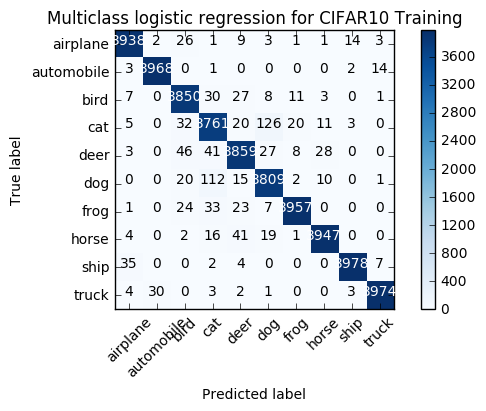

training accuracy for logistic regresion CIFAR10 = 0.976025
Confusion matrix, without normalization
[[896   7  29   8   3   2   4   9  30  10]
 [  6 930   1   4   2   1   0   0   7  28]
 [ 14   2 888  33  24   8  20   7   3   3]
 [  9   3  22 802  26  82  33  11   3   4]
 [  9   1  20  25 879   9  19  29   3   2]
 [  1   2   8  79  17 873  13  20   3   2]
 [  4   1  21  26  19   4 906   1   5   0]
 [  6   1   8  14  29  19   0 918   1   2]
 [ 43  10   3   2   1   0   5   3 929   2]
 [ 12  43   0   7   0   2   0   2  16 947]]


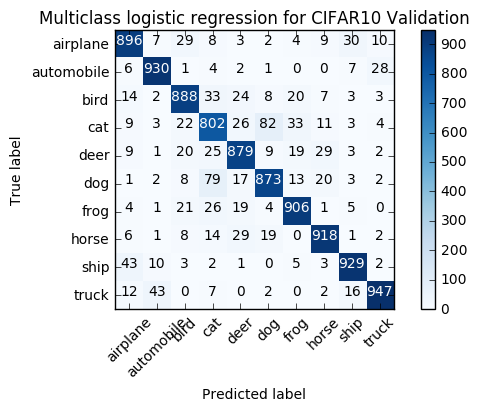

validation accuracy for logistic regression CIFAR10 = 0.8968


In [39]:
#Multi-class logistic regression for CIFAR10
from sklearn.linear_model import LogisticRegression
clf_l1_LR = LogisticRegression()
clf_l1_LR.fit(x_train10, y_train10)
res1 = clf_l1_LR.predict(x_train10)
res2 = clf_l1_LR.predict(x_val10)

cnf_matrix = confusion_matrix(res1, y_train10)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names, title = 'Multiclass logistic regression for CIFAR10 Training')
plt.show()
print "training accuracy for logistic regresion CIFAR10 = " + str(acc(res1,y_train10))

cnf_matrix = confusion_matrix(res2, y_val10)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names ,title = 'Multiclass logistic regression for CIFAR10 Validation')
plt.show()
print "validation accuracy for logistic regression CIFAR10 = " + str(acc(res2,y_val10))

In [40]:
#Multi-class logistic regression for CIFAR100
clf_l1_LR = LogisticRegression()
clf_l1_LR.fit(x_train100[0:10001,:], y_train100[0:10001])
res1 = clf_l1_LR.predict(x_train100)
res2 = clf_l1_LR.predict(x_val100)
print "training accuracy for logistic regresion CIFAR100 = " + str(acc(res1,y_train100))
print "validation accuracy for logistic regresion CIFAR100 = " + str(acc(res2,y_val100))

training accuracy for logistic regresion CIFAR100 = 0.738725
validation accuracy for logistic regresion CIFAR100 = 0.6522


Confusion matrix, without normalization
[[3321   78  120   21   50    9   20   65  297  153]
 [  33 3507    2    4    0    0    1    0   46  169]
 [  93   15 3156   85  142   39  101   65   12    9]
 [ 159  134  316 3357  225  618  296  276  172  102]
 [   7    3  169   76 3185   58   70  179    1    7]
 [  11    3   39  323   39 3187   21  114    9    7]
 [  12    4  164  119  112   11 3488    4    2    3]
 [  15    2   28   13  235   77    2 3287    2   13]
 [ 265   25    4    2    9    0    1    6 3420   52]
 [  84  229    2    0    3    1    0    4   39 3485]]


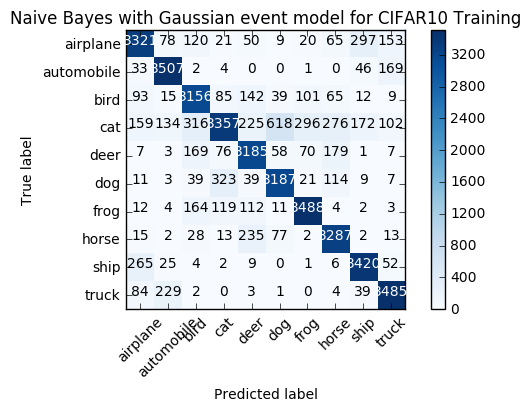

training accuracy for naive Bayes CIFAR10 = 0.834825
Confusion matrix, without normalization
[[824  18  32   4  17   1   2  15  74  35]
 [  3 862   0   1   1   0   0   0  12  34]
 [ 17   5 798  19  34  11  30  11   9   1]
 [ 48  41  73 817  49 155  78  70  34  36]
 [  3   1  41  21 794  15  19  44   0   1]
 [  2   2  15  97  16 804   9  35   1   1]
 [  4   1  25  32  31   2 862   1   2   0]
 [  1   3  10   6  53  12   0 819   0   4]
 [ 77   6   6   1   5   0   0   3 856  14]
 [ 21  61   0   2   0   0   0   2  12 874]]


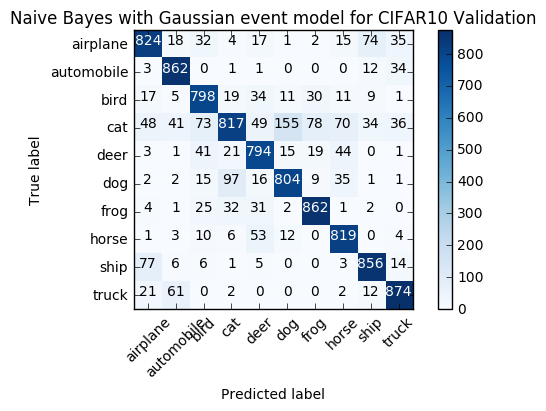

validation accuracy for naive Bayes CIFAR10 = 0.831


In [34]:
#NaiveBayes for CIFAR10
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nbmodel = gnb.fit(x_train10, y_train10)
res1 = nbmodel.predict(x_train10)
res2 = nbmodel.predict(x_val10)

cnf_matrix = confusion_matrix(res1, y_train10)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names, title = 'Naive Bayes with Gaussian event model for CIFAR10 Training')
plt.show()
print "training accuracy for naive Bayes CIFAR10 = " + str(acc(res1,y_train10))

cnf_matrix = confusion_matrix(res2, y_val10)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names ,title = 'Naive Bayes with Gaussian event model for CIFAR10 Validation')
plt.show()
print "validation accuracy for naive Bayes CIFAR10 = " + str(acc(res2,y_val10))

In [32]:
#Naive Bayes on CIFAR100
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nbmodel = gnb.fit(x_train100, y_train100)
res1 = nbmodel.predict(x_train100)
res2 = nbmodel.predict(x_val100)

print "training accuracy for naive Bayes CIFAR10 = " + str(acc(res1,y_train100))
print "validation accuracy for naive Bayes CIFAR10 = " + str(acc(res2,y_val100))

training accuracy for naive Bayes CIFAR10 = 0.6329
validation accuracy for naive Bayes CIFAR10 = 0.5887


In [36]:
#Finding initialization for CIFAR10 classification with k-means
init = np.zeros([10,2048])
for i in range(10):
    for j in range(40000):
        if y_train10[j] == i:
            #print j
            init[i,:] = x_train10[j,:]
            break

13
4
0
1
15
21
7
12
3
5


Confusion matrix, without normalization
[[ 289   34    7    5   15    0    2   27 3373   76]
 [  67 3569    5    7    2    4    1    4  101  210]
 [  51    2 2549  138  768   73  242   28    2    1]
 [ 187   67  454 2585  233 1076  490  217  110   37]
 [ 165   25  336  123  854  173   32 1503   42   71]
 [  46    8  239  943  146 2612   51  143   20   14]
 [  12    1  188  154  250   16 3162    5    3    2]
 [   0    0   65   13 1706   40    2 2040    0    3]
 [3051   25  155   14   22    3   17   19  262   38]
 [ 132  269    2   18    4    3    1   14   87 3548]]


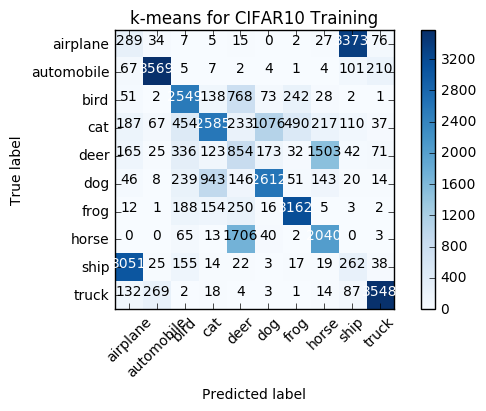

training accuracy for k-means CIFAR10 = 0.53675
Confusion matrix, without normalization
[[ 90   9   5   2   7   0   1   3 829  19]
 [ 14 882   2   1   2   0   1   0  28  43]
 [  9   1 628  36 198  11  70   2   1   1]
 [ 49  12 119 629  51 265 119  55  23  14]
 [ 52  10  78  25 221  43  12 369   9  15]
 [ 10   7  69 246  45 669  16  36   3   1]
 [  5   1  31  44  47   5 779   1   0   0]
 [  0   0  23   4 424   6   1 526   0   1]
 [745   5  45   4   5   1   1   6  76  11]
 [ 26  73   0   9   0   0   0   2  31 895]]


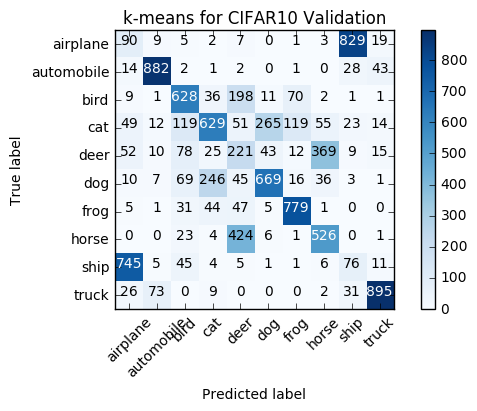

validation accuracy for k-means CIFAR10 = 0.5395


In [42]:
#k-means(usupervised)
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 10, init = init, max_iter = 1000, tol = 1e-2)
kmmodel = km.fit(x_train10, y_train10)
res1 = kmmodel.predict(x_train10)
res2 = kmmodel.predict(x_val10)

cnf_matrix = confusion_matrix(res1, y_train10)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names, title = 'k-means for CIFAR10 Training')
plt.show()
print "training accuracy for k-means CIFAR10 = " + str(acc(res1,y_train10))

cnf_matrix = confusion_matrix(res2, y_val10)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names ,title = 'k-means for CIFAR10 Validation')
plt.show()
print "validation accuracy for k-means CIFAR10 = " + str(acc(res2,y_val10))

# UPCOMING
1. Using ensembles of multi-class logistic regression and/or SVM seems promising for increasing validation accuracy, especially since we are only using 25% of the training set for a model.(the training accuracies have however been evaluated on the entire training set)
2. While the previous method seems more lucrative for accuracy, it would be more interesting to play around with other unsupervised classification algorithms. k-means is already giving us ~54% accuracy on CIFAR10 within a minute or so, which is only marginally worse than what a vanilla CNN gives after 5 hours of training on a regular PC( ~60%). This data is 2048-dimensional, and k-means works poorly in higher dimensions as Euclidean distances are large even at visually close locations in case of high dimensions. Hence, we can even try k-means itself with other distance measures.



[1] Krizhevsky, Alex, and Geoffrey Hinton. "Learning multiple layers of features from tiny images." (2009).